## Import

In [40]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

import pathlib
from typing import Any,Union   

In [41]:
print(tf.config.experimental.list_physical_devices())
print(tf.test.is_built_with_cuda())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
True


## Def

In [42]:
BATCH_SIZE:int  = 64
IMG_HEIGHT:int  = 227
IMG_WIDTH:int   = 227

# Valdiate 20% 
VAL_SPLIT:float = 0.2

model = {}


In [43]:
def get_dataset_dir(path) -> str:
    return pathlib.Path(path)

In [44]:
def load_dataset(dir) -> Union[list | Any, list | Any]:
  train_ds = tf.keras.utils.image_dataset_from_directory(
    dir,
    validation_split=VAL_SPLIT,
    label_mode='binary',
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)
  val_ds = tf.keras.utils.image_dataset_from_directory(
    dir,
    validation_split=VAL_SPLIT,
    subset="validation",
    label_mode='binary',
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)
  return train_ds, val_ds

In [45]:
def print_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

## Sketch

### Load Dataset

In [46]:
data_dir:str = get_dataset_dir('data_multi_binary/train/sketch')

train_ds, val_ds = load_dataset(data_dir)
class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE

# Load datasets in cache to optimize 
train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 198 files belonging to 2 classes.
Using 159 files for training.
Found 198 files belonging to 2 classes.
Using 39 files for validation.


### Model and Train

In [47]:
EPOCHS=15

with tf.device('/GPU:0'):
    # Def model
    model['sketch'] = tf.keras.Sequential([
        tf.keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

        # Feature extraction
        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        # Deep NN
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    # Compile model
    model['sketch'].compile(optimizer='adamax', # or adam
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
    
    # model.summary()
    
    checkpoint_filepath = '/tmp/checkpoint/sketch'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


    history:tf.keras.callbacks.History = model['sketch'].fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=model_checkpoint_callback
    )
    model['sketch'].load_weights(checkpoint_filepath)


Epoch 1/15
3/3 [==============================] - 13s 5s/step - loss: 0.8938 - accuracy: 0.5283 - val_loss: 0.6784 - val_accuracy: 0.5385
Epoch 2/15
3/3 [==============================] - 13s 6s/step - loss: 0.6812 - accuracy: 0.5283 - val_loss: 0.6334 - val_accuracy: 0.8205
Epoch 3/15
3/3 [==============================] - 8s 3s/step - loss: 0.6022 - accuracy: 0.6415 - val_loss: 0.5732 - val_accuracy: 0.7436
Epoch 4/15
3/3 [==============================] - 14s 5s/step - loss: 0.5005 - accuracy: 0.7799 - val_loss: 0.4664 - val_accuracy: 0.8462
Epoch 5/15
3/3 [==============================] - 8s 3s/step - loss: 0.4404 - accuracy: 0.7547 - val_loss: 0.5128 - val_accuracy: 0.6923
Epoch 6/15
3/3 [==============================] - 14s 6s/step - loss: 0.3550 - accuracy: 0.8491 - val_loss: 0.3026 - val_accuracy: 0.8718
Epoch 7/15
3/3 [==============================] - 9s 3s/step - loss: 0.3379 - accuracy: 0.8616 - val_loss: 0.3605 - val_accuracy: 0.7949
Epoch 8/15
3/3 [=====================

### Validate

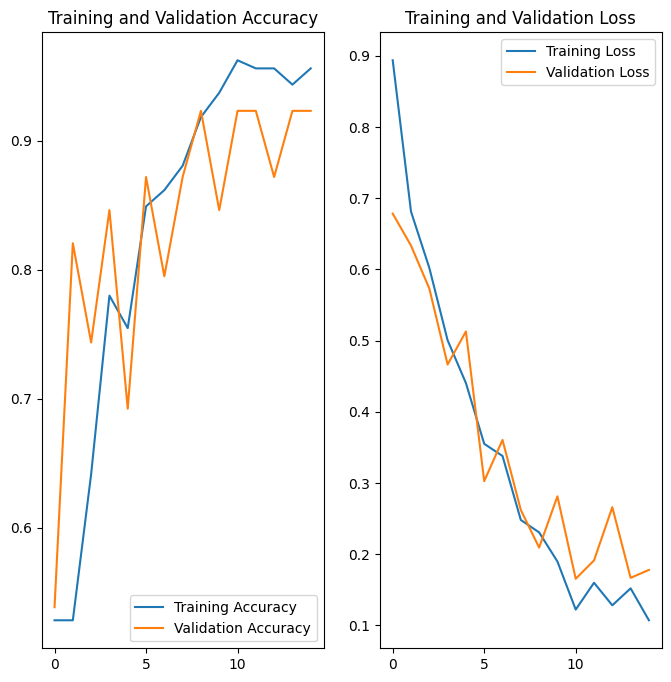

In [48]:
print_history(history)

## Text

### Load Dataset

In [49]:
data_dir:str = get_dataset_dir('data_multi_binary/train/text')

train_ds, val_ds = load_dataset(data_dir)
class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE

# Load datasets in cache to optimize 
train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 200 files belonging to 2 classes.
Using 160 files for training.
Found 200 files belonging to 2 classes.
Using 40 files for validation.


### Model and Train

In [50]:
EPOCHS=15

with tf.device('/GPU:0'):
    # Def model
    model['text'] = tf.keras.Sequential([
        tf.keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

        # Feature extraction
        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        # Deep NN
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    # Compile model
    model['text'].compile(optimizer='adamax', # or adam
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

    # model.summary()

    checkpoint_filepath = '/tmp/checkpoint/text'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
    history:tf.keras.callbacks.History = model['text'].fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=model_checkpoint_callback
    )

    model['text'].load_weights(checkpoint_filepath)

Epoch 1/15
3/3 [==============================] - 15s 6s/step - loss: 1.7196 - accuracy: 0.4563 - val_loss: 0.8689 - val_accuracy: 0.5000
Epoch 2/15
3/3 [==============================] - 9s 4s/step - loss: 0.8109 - accuracy: 0.5938 - val_loss: 0.6758 - val_accuracy: 0.5000
Epoch 3/15
3/3 [==============================] - 16s 7s/step - loss: 0.7288 - accuracy: 0.5000 - val_loss: 0.6584 - val_accuracy: 0.5750
Epoch 4/15
3/3 [==============================] - 9s 3s/step - loss: 0.6107 - accuracy: 0.6438 - val_loss: 0.6519 - val_accuracy: 0.5000
Epoch 5/15
3/3 [==============================] - 13s 6s/step - loss: 0.5918 - accuracy: 0.6938 - val_loss: 0.5648 - val_accuracy: 0.7250
Epoch 6/15
3/3 [==============================] - 9s 3s/step - loss: 0.5447 - accuracy: 0.7437 - val_loss: 0.5291 - val_accuracy: 0.6750
Epoch 7/15
3/3 [==============================] - 14s 6s/step - loss: 0.5141 - accuracy: 0.7437 - val_loss: 0.4971 - val_accuracy: 0.7500
Epoch 8/15
3/3 [=====================

### Validate

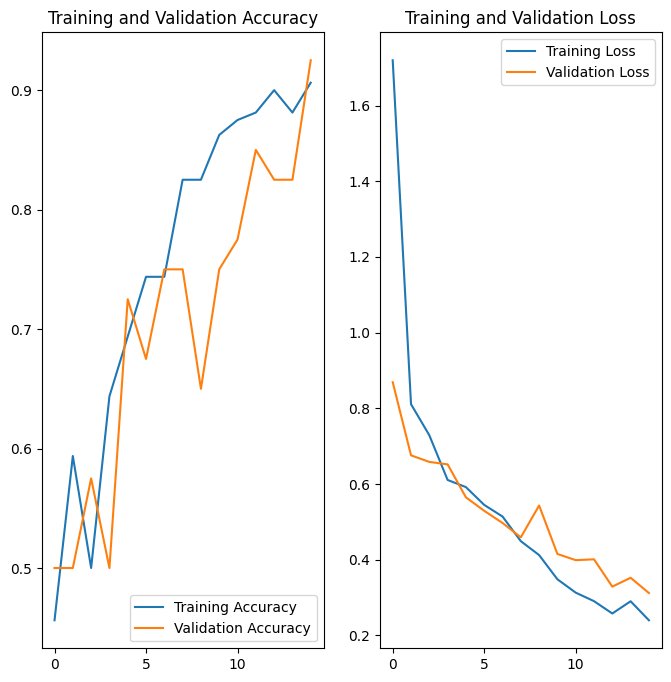

In [51]:
print_history(history)

## Schematics

### Load Dataset

In [52]:
data_dir:str = get_dataset_dir('data_multi_binary/train/schematics')

train_ds, val_ds = load_dataset(data_dir)
class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE

# Load datasets in cache to optimize 
train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 273 files belonging to 2 classes.
Using 219 files for training.
Found 273 files belonging to 2 classes.
Using 54 files for validation.


### Model and Train

In [53]:
EPOCHS=15

with tf.device('/GPU:0'):
    # Def model
    model['schematics'] = tf.keras.Sequential([
        tf.keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

        # Feature extraction
        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        # Deep NN
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    # Compile model
    model['schematics'].compile(optimizer='adamax', # or adam
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

    # model.summary()
    checkpoint_filepath = '/tmp/checkpoint/schematics'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
    history:tf.keras.callbacks.History = model['schematics'].fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=model_checkpoint_callback
    )
    model['schematics'].load_weights(checkpoint_filepath)

Epoch 1/15
4/4 [==============================] - 21s 5s/step - loss: 2.3705 - accuracy: 0.5936 - val_loss: 0.8786 - val_accuracy: 0.2778
Epoch 2/15
4/4 [==============================] - 20s 6s/step - loss: 0.7016 - accuracy: 0.5388 - val_loss: 0.6587 - val_accuracy: 0.7222
Epoch 3/15
4/4 [==============================] - 14s 3s/step - loss: 0.6827 - accuracy: 0.5982 - val_loss: 0.6209 - val_accuracy: 0.7222
Epoch 4/15
4/4 [==============================] - 13s 3s/step - loss: 0.6685 - accuracy: 0.6164 - val_loss: 0.6372 - val_accuracy: 0.7222
Epoch 5/15
4/4 [==============================] - 14s 4s/step - loss: 0.6738 - accuracy: 0.6073 - val_loss: 0.6292 - val_accuracy: 0.7222
Epoch 6/15
4/4 [==============================] - 12s 4s/step - loss: 0.6524 - accuracy: 0.6347 - val_loss: 0.6072 - val_accuracy: 0.7037
Epoch 7/15
4/4 [==============================] - 13s 3s/step - loss: 0.6406 - accuracy: 0.6347 - val_loss: 0.5930 - val_accuracy: 0.6667
Epoch 8/15
4/4 [==================

### Validate

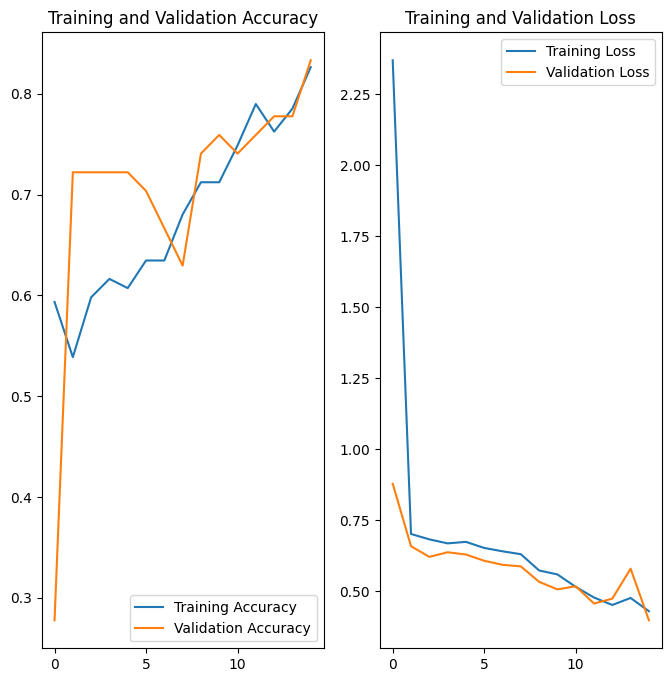

In [54]:
print_history(history)

## Painting

### Load Dataset

In [55]:
data_dir:str = get_dataset_dir('data_multi_binary/train/painting')

train_ds, val_ds = load_dataset(data_dir)
class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE

# Load datasets in cache to optimize 
train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 200 files belonging to 2 classes.
Using 160 files for training.
Found 200 files belonging to 2 classes.
Using 40 files for validation.


### Model and Train

In [56]:
EPOCHS=15

with tf.device('/GPU:0'):
    # Def model
    model['painting'] = tf.keras.Sequential([
        tf.keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

        # Feature extraction
        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        # Deep NN
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    # Compile model
    model['painting'].compile(optimizer='adamax', # or adam
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

    # model.summary()

    checkpoint_filepath = '/tmp/checkpoint/painting'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
    history:tf.keras.callbacks.History = model['painting'].fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=model_checkpoint_callback
    )
    model['painting'].load_weights(checkpoint_filepath)

Epoch 1/15
3/3 [==============================] - 18s 6s/step - loss: 1.3389 - accuracy: 0.4812 - val_loss: 0.8004 - val_accuracy: 0.5000
Epoch 2/15
3/3 [==============================] - 17s 7s/step - loss: 0.7983 - accuracy: 0.4875 - val_loss: 0.6759 - val_accuracy: 0.6250
Epoch 3/15
3/3 [==============================] - 17s 6s/step - loss: 0.6812 - accuracy: 0.5437 - val_loss: 0.6527 - val_accuracy: 0.7750
Epoch 4/15
3/3 [==============================] - 10s 3s/step - loss: 0.6311 - accuracy: 0.7312 - val_loss: 0.5668 - val_accuracy: 0.7500
Epoch 5/15
3/3 [==============================] - 15s 6s/step - loss: 0.5703 - accuracy: 0.7688 - val_loss: 0.4647 - val_accuracy: 0.8250
Epoch 6/15
3/3 [==============================] - 10s 3s/step - loss: 0.5222 - accuracy: 0.7625 - val_loss: 0.4720 - val_accuracy: 0.7500
Epoch 7/15
3/3 [==============================] - 16s 6s/step - loss: 0.5166 - accuracy: 0.7625 - val_loss: 0.3621 - val_accuracy: 0.8750
Epoch 8/15
3/3 [==================

### Validate

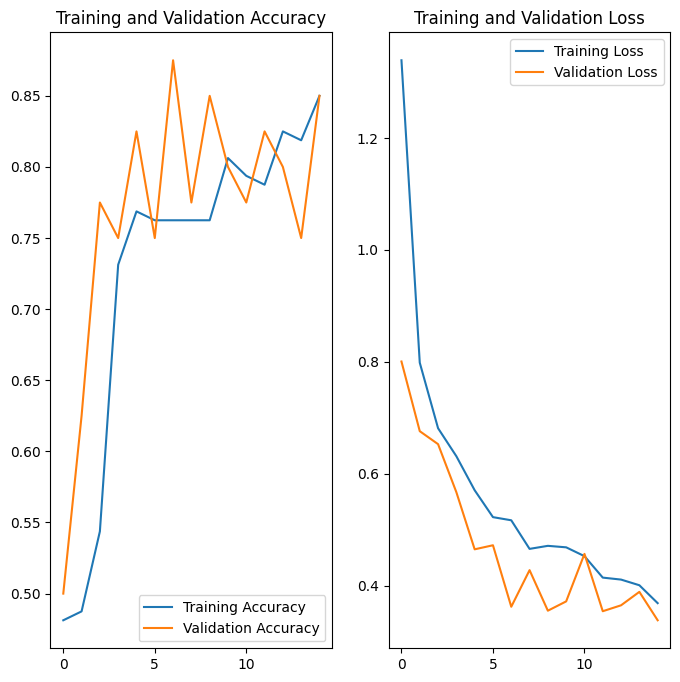

In [57]:
print_history(history)

## Photo

### Load Dataset

In [58]:
data_dir:str = get_dataset_dir('data_multi_binary/train/photo')

train_ds, val_ds = load_dataset(data_dir)
class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE

# Load datasets in cache to optimize 
train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 200 files belonging to 2 classes.
Using 160 files for training.
Found 200 files belonging to 2 classes.
Using 40 files for validation.


### Model and Train

In [59]:
EPOCHS=15

with tf.device('/GPU:0'):
    # Def model
    model['photo'] = tf.keras.Sequential([
        tf.keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

        # Feature extraction
        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        # Deep NN
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    # Compile model
    model['photo'].compile(optimizer='adamax', # or adam
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

    # model.summary()
    checkpoint_filepath = '/tmp/checkpoint/photo'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
    history:tf.keras.callbacks.History = model['photo'].fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=model_checkpoint_callback
    )
    model['photo'].load_weights(checkpoint_filepath)

Epoch 1/15
3/3 [==============================] - 17s 6s/step - loss: 0.9142 - accuracy: 0.5750 - val_loss: 0.7341 - val_accuracy: 0.5000
Epoch 2/15
3/3 [==============================] - 10s 3s/step - loss: 0.6959 - accuracy: 0.5813 - val_loss: 0.6830 - val_accuracy: 0.5000
Epoch 3/15
3/3 [==============================] - 15s 6s/step - loss: 0.6797 - accuracy: 0.5562 - val_loss: 0.6554 - val_accuracy: 0.6250
Epoch 4/15
3/3 [==============================] - 10s 3s/step - loss: 0.6501 - accuracy: 0.6500 - val_loss: 0.6267 - val_accuracy: 0.6250
Epoch 5/15
3/3 [==============================] - 10s 3s/step - loss: 0.6143 - accuracy: 0.6313 - val_loss: 0.5993 - val_accuracy: 0.6250
Epoch 6/15
3/3 [==============================] - 19s 7s/step - loss: 0.5550 - accuracy: 0.7125 - val_loss: 0.5822 - val_accuracy: 0.7500
Epoch 7/15
3/3 [==============================] - 10s 3s/step - loss: 0.5306 - accuracy: 0.7688 - val_loss: 0.6093 - val_accuracy: 0.7000
Epoch 8/15
3/3 [==================

### Validate

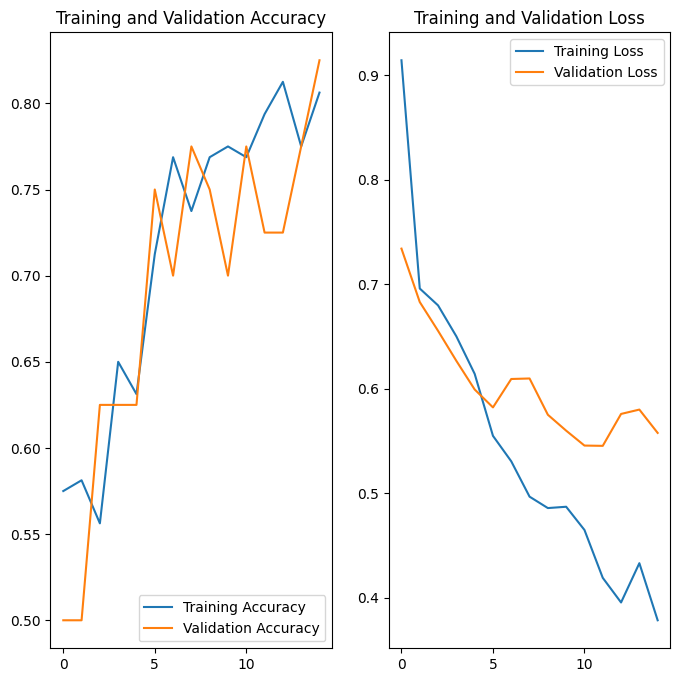

In [60]:
print_history(history)

## Test

In [61]:
test_images = tf.keras.utils.image_dataset_from_directory(
    'data_multi_binary/validation',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    # validation_split=VAL_SPLIT,
    # subset="training",
    # seed=123,
    #batch_size=BATCH_SIZE
)

class_names = test_images.class_names
print(class_names)
i = 0
error = 0

for b_images, b_labels in test_images.take(-1):
    predictions = model['text'].predict(b_images, verbose=0)
    
    for image, label, prediction in zip(b_images, b_labels, predictions) :
        print(class_names[label.numpy()],'text',int(np.round(prediction)))
        if not int(np.round(prediction)):

            batch_img = tf.expand_dims(image, 0)
            predictions = model['sketch'].predict(batch_img, verbose=0)
                
            print(class_names[label.numpy()],'sketch',int(np.round(predictions[0])))
            if not int(np.round(predictions[0])):
                predictions = model['schematics'].predict(batch_img, verbose=0)
                print(class_names[label.numpy()],'schematics',int(np.round(predictions[0])))
                if not int(np.round(predictions[0])):
                    predictions = model['painting'].predict(batch_img, verbose=0)
                    print(class_names[label.numpy()],'painting',int(np.round(predictions[0])))
                    if not int(np.round(predictions[0])):
                        predictions = model['photo'].predict(batch_img, verbose=0)
                        print(class_names[label.numpy()],'photo',int(np.round(predictions[0])))
                        if not int(np.round(predictions[0])):
                            print('isPhoto')
                            if class_names[label.numpy()] == 'photo':
                                print('error is photo')
                                error += 1

                        else:
                            if class_names[label.numpy()] != 'photo':
                                print('error is not photo')
                                error += 1

                    else:
                        if class_names[label.numpy()] != 'painting':
                            print('error is not painting')
                            error += 1

                else:
                    if class_names[label.numpy()] != 'schematics':
                        print('error is not schematics')
                        error += 1

            else:
                if class_names[label.numpy()] != 'sketch':
                    print('error is not sketch')
                    error += 1

        else:
            if class_names[label.numpy()] != 'text':
                print('error is not text')
                error += 1
            # plt.figure(figsize=(6,3))
            # plt.imshow(image.numpy().astype("uint8"))
            # plt.xlabel("Pred:{} {:2.0f}% (True:{})".format(class_names[int(np.round(prediction))], 100*np.max(predictions), class_names[label.numpy()]),color='red')

        i += 1
        print('next')
        

print(f"Number error: {error} on {i} images")
print(f"{error/i*100}% error")

Found 268 files belonging to 5 classes.
['painting', 'photo', 'schematics', 'sketch', 'text']
photo text 0
photo sketch 0
photo schematics 0
photo painting 1
error is not painting
next
painting text 0
painting sketch 0
painting schematics 0
painting painting 1
next
painting text 0
painting sketch 0
painting schematics 1
error is not schematics
next
photo text 0
photo sketch 0
photo schematics 0
photo painting 1
error is not painting
next
text text 1
next
text text 1
next
painting text 0
painting sketch 0
painting schematics 1
error is not schematics
next
text text 1
next
schematics text 0
schematics sketch 0
schematics schematics 1
next
sketch text 0
sketch sketch 1
next
schematics text 0
schematics sketch 0
schematics schematics 0
schematics painting 0
schematics photo 1
error is not photo
next
sketch text 0
sketch sketch 0
sketch schematics 0
sketch painting 0
sketch photo 0
isPhoto
next
photo text 0
photo sketch 0
photo schematics 0
photo painting 1
error is not painting
next
text t

Found 268 files belonging to 5 classes.
['painting', 'photo', 'schematics', 'sketch', 'text']
Number error: 22 on 268 images
8.208955223880597% error
Number not sure: 109 on 268 images
40.67164179104478% not sure
Number not sure and false: 29 on 268 images
10.820895522388058% not sure and false
Number error on photo: 31 on 268 images
11.567164179104477% error on photo


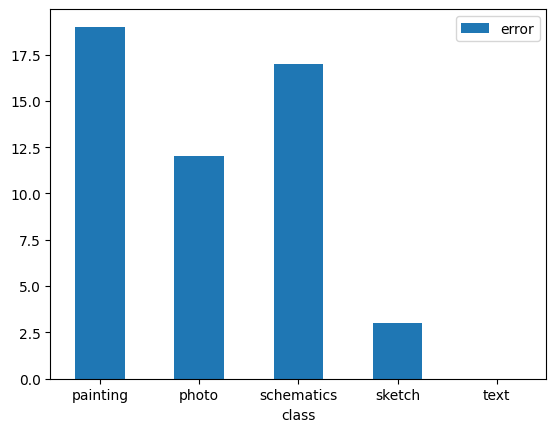

In [69]:
test_images = tf.keras.utils.image_dataset_from_directory(
    'data_multi_binary/validation',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    # validation_split=VAL_SPLIT,
    # subset="training",
    # seed=123,
    #batch_size=BATCH_SIZE
)

class_names = test_images.class_names
print(class_names)
i = 0
error = 0
notsure = 0
repartion = {}
photo_error = 0
notsure_error = 0
for class_name in class_names:
    repartion[class_name] = 0

for b_images, b_labels in test_images.take(-1):
    prediction1 = model['painting'].predict(b_images, verbose=0)
    prediction2 = model['photo'].predict(b_images, verbose=0)
    prediction3 = model['schematics'].predict(b_images, verbose=0)
    prediction4 = model['sketch'].predict(b_images, verbose=0)
    prediction5 = model['text'].predict(b_images, verbose=0)

    for image, label, prediction in zip(b_images, b_labels, zip(prediction1,prediction2,prediction3,prediction4,prediction5)) :
        
        result = {}
        find = 0
        great = 0

        n = 0
        for pred in prediction:
            result[class_names[n]] = pred[0]
            if int(np.round(pred)):
                find += 1
                great = 0
                if class_names[label.numpy()] == class_names[n]:
                    great = 1
            n+=1

        if not great:
            #print(class_names[label.numpy()],find,result)
            if find != 1:
                notsure += 1
                if find > 1:
                    if class_names[label.numpy()] != max(result, key=result.get):
                        notsure_error += 1
                        repartion[class_names[label.numpy()]] +=1
                        if class_names[label.numpy()] == 'photo' or max(result, key=result.get) == 'photo':
                            photo_error += 1
            else:
                repartion[class_names[label.numpy()]] +=1
                error += 1
                if class_names[label.numpy()] == 'photo' or max(result, key=result.get) == 'photo':
                    photo_error += 1
        i += 1
        

print(f"Number error: {error} on {i} images")
print(f"{error/i*100}% error")
print(f"Number not sure: {notsure} on {i} images")
print(f"{notsure/i*100}% not sure")
print(f"Number not sure and false: {notsure_error} on {i} images")
print(f"{notsure_error/i*100}% not sure and false")
print(f"Number error on photo: {photo_error} on {i} images")
print(f"{photo_error/i*100}% error on photo")
import pandas as pd
df = pd.DataFrame({'class':repartion.keys(), 'error':repartion.values()})
ax = df.plot.bar(x='class', y='error', rot=0)